# Titlte: "Examining Cutting-Edge Machine Learning Strategies with Shrinkage Operator and Seeonce for Breast Cancer Diagnosis and Prognosis"

# Required Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve,auc
!pip install xgboost
!pip install --upgrade xgboost
from xgboost import XGBClassifier

# Load Dataset

In [ ]:
df1 = pd.read_csv('/content/cancer_data_1.csv')
df1.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:

df2 = pd.read_csv('/content/cancer_data_2.csv')
df2.head(10)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
5,49,White,Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,32,Positive,Positive,20,11,3,Alive
6,64,White,Single (never married),NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,22,Positive,Positive,1,1,3,Dead
7,55,White,Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,15,Positive,Positive,9,1,3,Alive
8,59,White,Single (never married),NaN,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,70,Positive,Positive,9,1,4,Dead
9,67,White,Married (including common law),NaN,T3,N2,IIIA,Poorly differentiated; Grade III,Regional,55,Positive,Positive,9,9,4,Dead


In [ ]:
df1.shape


(569, 32)

In [ ]:
df2.shape

(4024, 16)

# TO know the Each column of Dataset

In [ ]:
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df2.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

# Combined the dataset

In [ ]:
combined_df = pd.concat([df1, df2], axis=1)



In [ ]:
combined_df.shape

(4024, 48)

# To know the column name of the dataset

In [ ]:
combined_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Age', 'Race ',
       'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

# Descriptive Analysis

In [ ]:
print(combined_df.describe())


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

# To check the missing values

In [ ]:
print(combined_df.isnull().sum())


id                         3455
diagnosis                  3455
radius_mean                3455
texture_mean               3455
perimeter_mean             3455
area_mean                  3455
smoothness_mean            3455
compactness_mean           3455
concavity_mean             3455
concave_points_mean        3455
symmetry_mean              3455
fractal_dimension_mean     3455
radius_se                  3455
texture_se                 3455
perimeter_se               3455
area_se                    3455
smoothness_se              3455
compactness_se             3455
concavity_se               3455
concave_points_se          3455
symmetry_se                3455
fractal_dimension_se       3455
radius_worst               3455
texture_worst              3455
perimeter_worst            3455
area_worst                 3455
smoothness_worst           3455
compactness_worst          3455
concavity_worst            3455
concave_points_worst       3455
symmetry_worst             3455
fractal_

# To know the Data type

In [ ]:
print(combined_df.dtypes)


id                         float64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# To check the cateorical column

In [ ]:
combined_df['diagnosis'] = combined_df['diagnosis'].astype('category')


In [ ]:
combined_df.drop('Unnamed: 3', axis=1, inplace=True)


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Create a DataFrame (replace this with your 'combined_df')
# combined_df = pd.read_csv("your_data.csv")

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can change the number of neighbors

# Select numerical columns (assuming you want to impute only numerical variables)
numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# Apply the imputer
combined_df[numerical_cols] = imputer.fit_transform(combined_df[numerical_cols])

# Now your DataFrame 'combined_df' should have the missing values filled in.


In [ ]:
combined_df['id'] = combined_df['id'].astype('int64')


# check the missing values again

In [ ]:
print(combined_df.isnull().sum())

id                            0
diagnosis                  3455
radius_mean                   0
texture_mean                  0
perimeter_mean                0
area_mean                     0
smoothness_mean               0
compactness_mean              0
concavity_mean                0
concave_points_mean           0
symmetry_mean                 0
fractal_dimension_mean        0
radius_se                     0
texture_se                    0
perimeter_se                  0
area_se                       0
smoothness_se                 0
compactness_se                0
concavity_se                  0
concave_points_se             0
symmetry_se                   0
fractal_dimension_se          0
radius_worst                  0
texture_worst                 0
perimeter_worst               0
area_worst                    0
smoothness_worst              0
compactness_worst             0
concavity_worst               0
concave_points_worst          0
symmetry_worst                0
fractal_

In [ ]:
# To fill with the most frequent value
most_frequent = combined_df['diagnosis'].mode()[0]
combined_df['diagnosis'].fillna(most_frequent, inplace=True)


In [ ]:
print(combined_df.dtypes)


id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave_points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave_points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [ ]:
print(combined_df.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Age', 'Race ',
       'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Status'],
      dtype='object')


In [ ]:
# To remove extra spaces
combined_df.rename(columns={'Race ': 'Race', 'T Stage ': 'TStage'}, inplace=True)


In [ ]:
combined_df = pd.get_dummies(combined_df, columns=['Race', 'Marital Status', 'TStage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'])


# Feature Scaling

In [ ]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of numeric columns that you want to scale
columns_to_scale = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                    'smoothness_mean', 'compactness_mean', 'concavity_mean',
                    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                    'smoothness_se', 'compactness_se', 'concavity_se',
                    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
                    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                    'smoothness_worst', 'compactness_worst', 'concavity_worst',
                    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst',
                    'Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
                    'Survival Months']

# Apply the scaling to those columns
combined_df[columns_to_scale] = scaler.fit_transform(combined_df[columns_to_scale])


In [ ]:
corr_matrix = combined_df.corr()
print(corr_matrix)


                                    id  radius_mean  texture_mean  \
id                            1.000000     0.211766      0.006810   
radius_mean                   0.211766     1.000000      0.143814   
texture_mean                  0.006810     0.143814      1.000000   
perimeter_mean                0.201105     0.998243      0.156939   
area_mean                     0.214561     0.987391      0.170428   
...                                ...          ...           ...   
Estrogen Status_Positive      0.035384     0.039185      0.075267   
Progesterone Status_Negative  0.025486     0.006771     -0.079305   
Progesterone Status_Positive -0.025486    -0.006771      0.079305   
Status_Alive                 -0.003492    -0.037405      0.211782   
Status_Dead                   0.003492     0.037405     -0.211782   

                              perimeter_mean  area_mean  smoothness_mean  \
id                                  0.201105   0.214561         0.007312   
radius_mean        

<ipython-input-1203-703862bf0194>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = combined_df.corr()


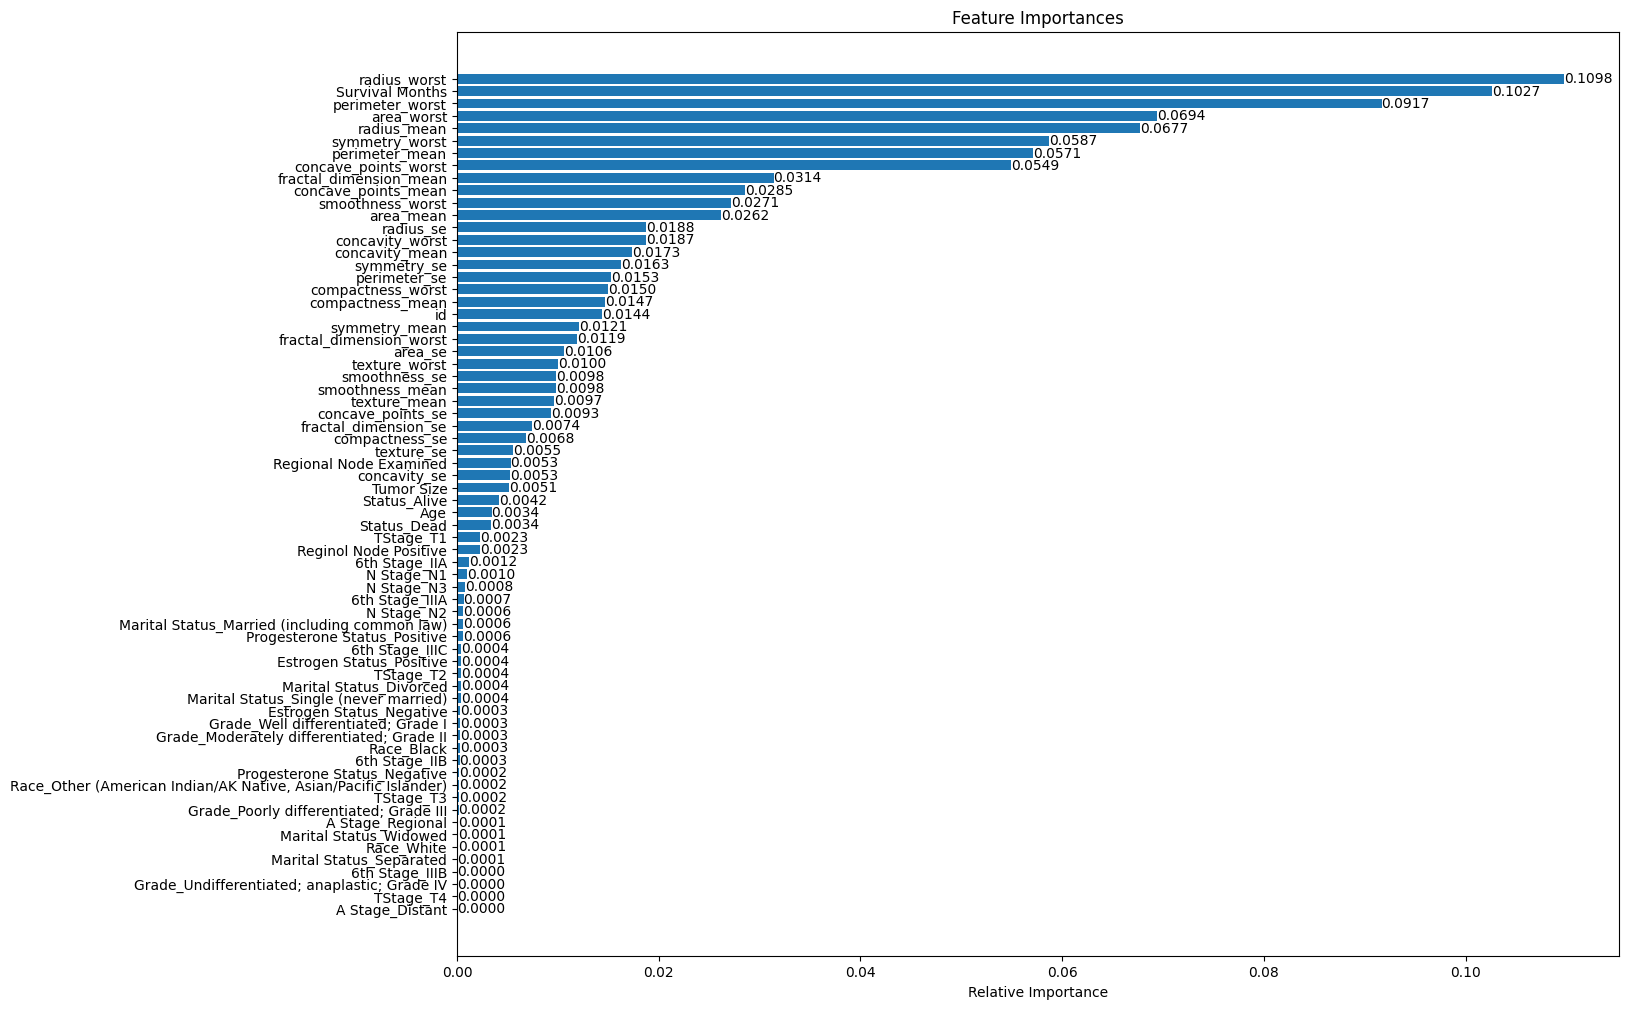

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have combined_df loaded
# combined_df = pd.read_csv('your_data.csv')

# Separate features and target
X = combined_df.drop('diagnosis', axis=1)
y = combined_df['diagnosis']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances and feature names
importances = clf.feature_importances_
feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# Plot
plt.figure(figsize=(15, 12))
plt.title("Feature Importances")

bars = plt.barh(range(X_train.shape[1]), sorted_importances, align="center")
plt.yticks(range(X_train.shape[1]), sorted_feature_names)
plt.gca().invert_yaxis()
plt.xlabel('Relative Importance')

# Add text annotations to the bars
for bar in bars:
    width = bar.get_width()
    plt.gca().text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center', ha='left')

plt.show()


# Feature Selection: LASSO

Diagnosis: This would be crucial for a machine learning model aimed at "Breast Cancer Detection." A model could be trained to predict whether a tumor is malignant or benign based on the features. This is probably your primary target variable for detection.

Survival Months: If you're interested in predicting patient outcomes, then the number of months a patient is expected to survive could serve as another target variable. This would be more along the lines of "Prediction."

Status: If this variable indicates whether the patient is alive or has passed away, it could also be a target variable for predictive models focusing on patient outcomes.

These target variables are suited for different kinds of tasks:

Diagnosis: Classification (Malignant or Benign)
Survival Months: Regression (Predicting a continuous outcome)
Status: Classification (Alive or Passed Away)

First, split your features and target variable:

In [ ]:
# Assuming 'diagnosis' is your target variable
X = combined_df.drop('diagnosis', axis=1)
y = combined_df['diagnosis']


# Then, import the necessary module and split the data into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Log Transformations

In [ ]:
import numpy as np

combined_df['log_area_mean'] = np.log1p(combined_df['area_mean'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


#fit the Lasso model:

Convert Categorical Target Variable to Numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)


In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X_train, y_train)


# Adjusting Alpha

The alpha parameter in Lasso regularization controls the strength of the regularization. A too-high alpha will nullify the effect of all features, while a too-low alpha will make the model almost identical to linear regression. You can try specifying a range of alphas to see which works best:

In [ ]:
alphas = np.logspace(-4, 4, 50)
lasso = LassoCV(alphas=alphas, cv=5).fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.225302979146168, tolerance: 0.011621980582524253
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.712669541048697, tolerance: 0.011621980582524253
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.211834926832452, tolerance: 0.011621980582524253
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Co

# To see the coefficients for each feature:

In [ ]:
print("Lasso coefficients:", lasso.coef_)


Lasso coefficients: [-4.78100939e-10 -0.00000000e+00 -1.65987275e-03 -9.15540740e-03
 -7.64364723e-03 -2.56607439e-03 -9.99308154e-03 -2.17947433e-02
  0.00000000e+00 -1.69556697e-02 -3.80347039e-02  0.00000000e+00
  1.30330769e-02 -0.00000000e+00 -0.00000000e+00  2.13473877e-02
  7.19193919e-03  0.00000000e+00 -0.00000000e+00  1.13405201e-02
  0.00000000e+00  1.12218512e-01  1.52007399e-02 -0.00000000e+00
  0.00000000e+00  3.43069534e-02  0.00000000e+00  0.00000000e+00
  2.79225180e-02  3.90071543e-02  1.50832123e-02 -1.24289712e-02
  1.23357633e-02 -1.28941488e-02 -0.00000000e+00 -8.36792816e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.55843626e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -6.65767641e-03  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  3.06856498e-03  0.00000000e+00 -2.91467608e-03
 -0.0

Non-zero Coefficients: Features with non-zero coefficients are selected by the Lasso model as important features for predicting the target variable. The absolute value of these coefficients gives an indication of their importance.

Positive vs. Negative Coefficients: The sign of the coefficient indicates the direction of the relationship between the feature and the target. A positive coefficient suggests that as the feature value increases, the target variable also increases. A negative coefficient suggests the opposite.

Zero Coefficients: Features with a coefficient close to zero have been effectively removed from the model. Lasso considers them as not useful for predicting the target variable in the given context.

Magnitude of Coefficients: Higher absolute values indicate features that contribute more to the model, while lower absolute values indicate features that contribute less.

# Alpha

To see the amount of regularization chosen by cross-validation:

In [ ]:
print("Best alpha:", lasso.alpha_)


Best alpha: 0.0013894954943731374


an optimal alpha value of approximately
0.0014
0.0014 suggests that a small but non-zero amount of regularization is beneficial for your model.



Regularization Strength: A smaller alpha means less regularization, which in turn means most of the features are kept in the model. Too small an alpha can lead to overfitting, while too large an alpha can lead to underfitting.

Model Complexity: A lower alpha value also indicates that the model can afford to be more complex, incorporating more features for prediction. In other words, it does not need to "zero out" a lot of feature coefficients, implying many features are informative.

Optimal Value: The fact that the optimal alpha isn't zero suggests that some amount of regularization helps the model generalize better to unseen data. However, since it is very close to zero, it suggests that only a slight regularization is enough.

# R-Squared

In [ ]:
print("Training R-Squared:", lasso.score(X_train, y_train))


Training R-Squared: 0.5256313733074833


The value of R square
  can range from 0 to 1, where a higher value generally indicates a better fit of the model to the data, provided the model also generalizes well to unseen data.




  R square  value of approximately 0.526 suggests that about 52.6% of the variance in the dependent variable can be explained by the features in your model. While this is not necessarily a bad score, depending on the complexity of the problem and the quality of the data, there is room for improvement.

# Predictions

In [ ]:
y_pred = lasso.predict(X_train)
print("Predictions:", y_pred)


Predictions: [-0.0732416   0.02670834  0.00542923 ...  0.13575403  0.02226894
 -0.06399384]


In [ ]:
combined_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Age', 'Tumor Size',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Race_Black',
       'Race_Other (American Indian/AK Native, Asian/Pacific Islander)',
       'Race_White', 'Marital Status_Divorced',
       'Marital Status_Married (including common law)',
       'Marital Status_Separated', 'Marital Status_Single (never married)',
 

In [ ]:
# Check for missing values in each column
missing_values = combined_df.isna().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
log_area_mean    520
dtype: int64


In [ ]:
pip install scikit-learn


# Missing values fill by KNN

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the column with missing values and transform it
combined_df['log_area_mean'] = knn_imputer.fit_transform(combined_df[['log_area_mean']])

# Check if there are still missing values
missing_values_after = combined_df.isna().sum()
print("Missing values after imputation:")
print(missing_values_after[missing_values_after > 0])


Missing values after imputation:
Series([], dtype: int64)


In [ ]:
df2.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

# Face Grid for df2


"Age" and "Grade": Age can be an important factor in many medical conditions, and "Grade" refers to the stage of the disease. By plotting them together, you can explore whether there are age-related trends in the stage of the disease.

"Survival Months" and "Race": Survival time is a critical metric in any disease study, and racial disparities in healthcare are a topic of ongoing research. This combination could help you explore whether survival rates differ among races.

#To see how Age is distributed among different Grades:

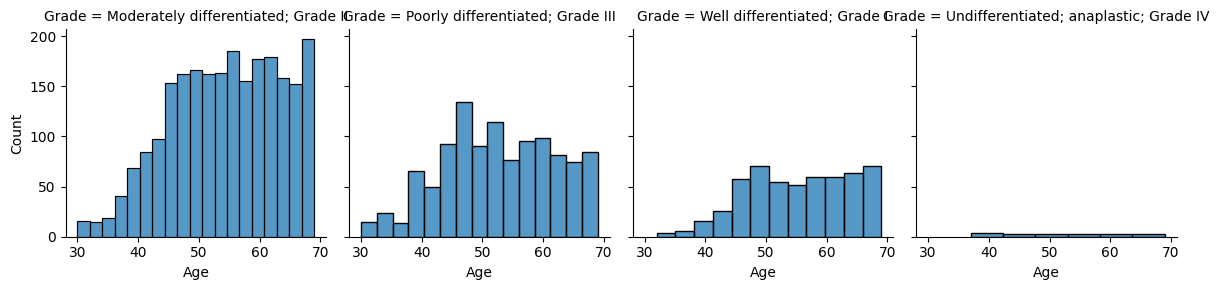

In [ ]:
g = sns.FacetGrid(df2, col='Grade')
g.map(sns.histplot, 'Age')


#To visualize Survival Months among different Races:

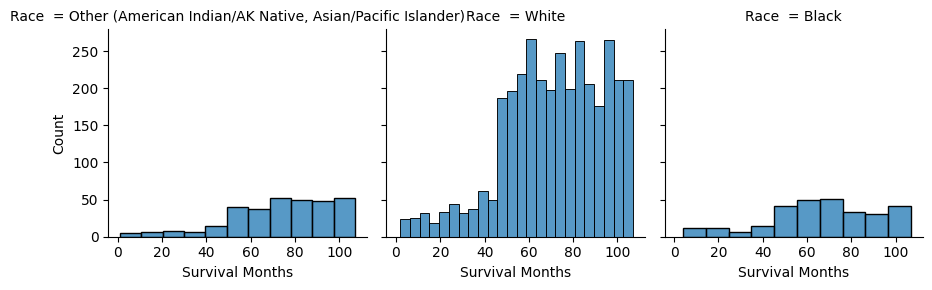

In [ ]:
g = sns.FacetGrid(df2, col='Race ')
g.map(sns.histplot, 'Survival Months')


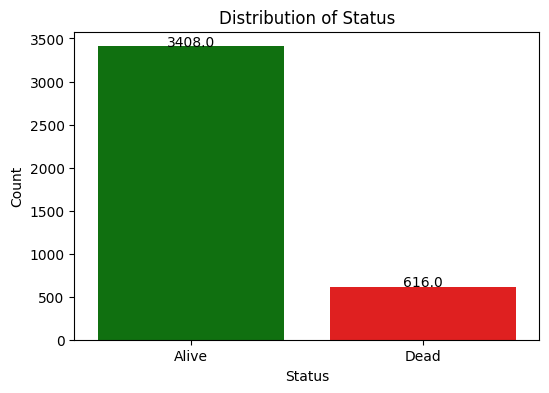

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # Set figure size

# Create the countplot
ax = sns.countplot(x='Status', data=df2, palette={"Alive": "green", "Dead": "red"})

# Add value annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')

plt.show()


# Parallel Coordinates

In [ ]:
print(df2.columns)


Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
labelencoder = LabelEncoder()

# Select columns that are categorical and need to be encoded
categorical_cols = ['Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']

# Apply LabelEncoder on each of the selected columns
for column in categorical_cols:
    df2[column] = labelencoder.fit_transform(df2[column])


In [ ]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df2.iloc[:,1]=labelencoder_Y.fit_transform(df2.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df2.iloc[:,1].values))
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df2.iloc[:,1]=labelencoder_Y.fit_transform(df2.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df2.iloc[:,1].values))

[1 1 2 ... 2 1 2]
[1 1 2 ... 2 1 2]


In [ ]:
pip install networkx matplotlib


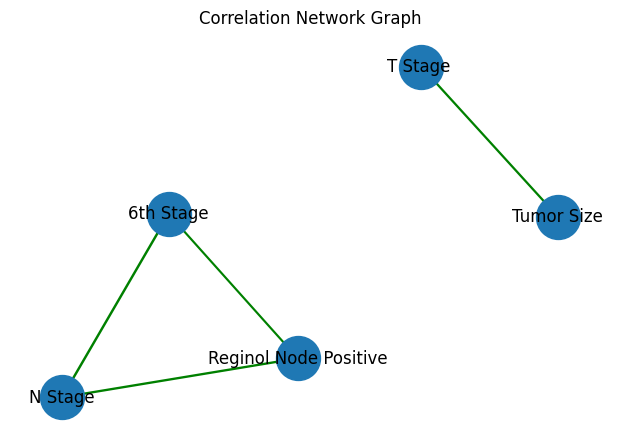

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Compute correlation
corr = df2.corr()

# Add edges to the graph with weight equal to correlation, considering stronger correlations (e.g., > 0.7)
for col in corr.columns:
    for index in corr.index:
        if abs(corr.loc[index, col]) > 0.7 and index != col:  # Avoid self-loops by ensuring index != col
            G.add_edge(index, col, weight=corr.loc[index, col])

# Use Kamada-Kawai layout for positioning
pos = nx.kamada_kawai_layout(G)

# Define edge colors based on correlation sign
edge_colors = ["green" if G[u][v]['weight'] > 0 else "red" for u, v in G.edges()]

# Draw the graph with custom node sizes, font sizes, and edge colors
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True,
        node_size=1000,
        font_size=12,
        width=[2 * abs(G[u][v]['weight']) for u, v in G.edges()],
        edge_color=edge_colors)

plt.title("Correlation Network Graph")
plt.show()


# Identify column for missing values before making the model

In [ ]:
print(df2.isnull().sum())


Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64


In [ ]:
df2.drop('Unnamed: 3', axis=1, inplace=True)


# Again check misisng values after deleting unusual column

In [ ]:
print(df2.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Create KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # You can change the number of neighbors

# Apply the imputer
df2_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

# Check if NaN values are still there
print(df2_imputed.isnull().sum())


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


# Verify the data after filling the NaN values

In [ ]:
# Examine a few rows of the imputed data
print(df2_imputed.head())


    Age  Race   Marital Status  T Stage   N Stage  6th Stage  Grade  A Stage  \
0  43.0    1.0             1.0       1.0      2.0        4.0    0.0      1.0   
1  47.0    1.0             1.0       1.0      1.0        2.0    0.0      1.0   
2  67.0    2.0             1.0       1.0      0.0        1.0    1.0      1.0   
3  46.0    2.0             0.0       0.0      0.0        0.0    0.0      1.0   
4  63.0    2.0             1.0       1.0      1.0        2.0    0.0      1.0   

   Tumor Size  Estrogen Status  Progesterone Status  Regional Node Examined  \
0        40.0              1.0                  1.0                    19.0   
1        45.0              1.0                  1.0                    25.0   
2        25.0              1.0                  1.0                     4.0   
3        19.0              1.0                  1.0                    26.0   
4        35.0              1.0                  1.0                    21.0   

   Reginol Node Positive  Survival Months  S

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Convert the 'Status' column to a numeric type if it's not
df2['Status'] = pd.to_numeric(df2['Status'], errors='coerce')

# Separate features and target variable
X = df2.drop('Status', axis=1)
y = df2['Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso
lasso = Lasso(alpha=0.001)  # Adjust alpha as necessary

# Fit the model
lasso.fit(X_train_scaled, y_train)

# Check the coefficients
print("Lasso coefficients:", lasso.coef_)

# You can then plot these coefficients to visualize feature importance


Lasso coefficients: [ 0.01833049 -0.00504516  0.00158161  0.03280899  0.01673445 -0.00179702
 -0.00583766 -0.0054019  -0.00853351 -0.02642961 -0.02635832 -0.02033942
  0.05486891 -0.14705964]


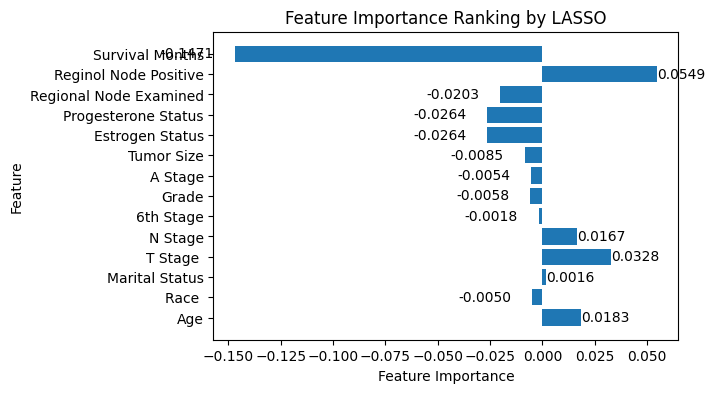

In [ ]:
import matplotlib.pyplot as plt

# Evaluate feature importances
importances = lasso.coef_
feature_names = X_imputed_df.columns

# Plotting feature importances
plt.figure(figsize=(6, 4))
bars = plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in range(len(importances))])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking by LASSO')

# Add values on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width if width >= 0 else width - 0.01,  # Shift text to left for negative bars
             bar.get_y() + bar.get_height()/2,
             f'{width:.4f}',  # 4 decimal places
             va='center',
             ha='left' if width >= 0 else 'right')  # Horizontal alignment

plt.show()


In [ ]:
print("Feature importances:", importances)


Feature importances: [ 0.01833049 -0.00504516  0.00158161  0.03280899  0.01673445 -0.00179702
 -0.00583766 -0.0054019  -0.00853351 -0.02642961 -0.02635832 -0.02033942
  0.05486891 -0.14705964]


In [ ]:
pip install catboost lightgbm


# Performance of different classification models.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Your df2 DataFrame should be here
# df2 = ...

# Extract features and labels
X = df2.drop('Status', axis=1)
y = df2['Status']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'AdaBoost': AdaBoostClassifier(),
        'ExtraTrees': ExtraTreesClassifier(),
        'QDA': QuadraticDiscriminantAnalysis(),
        'CatBoost': CatBoostClassifier(verbose=0),
        'LightGBM': lgb.LGBMClassifier(),
        'GaussianNB': GaussianNB(),
        'PassiveAggressive': PassiveAggressiveClassifier(),
        'Perceptron': Perceptron(),
        'RidgeClassifier': RidgeClassifier(),
        'SGDClassifier': SGDClassifier()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy * 100:.2f}%")

# Run the function
evaluate_models(X_train, y_train, X_test, y_test)


AdaBoost Accuracy: 90.07%
ExtraTrees Accuracy: 88.99%
QDA Accuracy: 84.19%
CatBoost Accuracy: 90.40%
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 424, number of negative: 2392
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 2816, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150568 -> initscore=-1.730152
[LightGBM] [Info] Start training from score -1.730152
LightGBM Accuracy: 90.56%
GaussianNB Accuracy: 81.46%
PassiveAggressive Accuracy: 88.74%
Perceptron Accuracy: 86.18%
RidgeClassifier Accuracy: 88.74%
SGDClassifier Accuracy: 88.66%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier

# Your df2 DataFrame should be here
# df2 = ...

# Extract features and labels
X = df2.drop('Status', axis=1)
y = df2['Status']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'AdaBoost': AdaBoostClassifier(),
        'ExtraTrees': ExtraTreesClassifier(),
        'QDA': QuadraticDiscriminantAnalysis(),
        'CatBoost': CatBoostClassifier(verbose=0),
        'LightGBM': lgb.LGBMClassifier(),
        'GaussianNB': GaussianNB(),
        'PassiveAggressive': PassiveAggressiveClassifier(),
        'Perceptron': Perceptron(),
        'RidgeClassifier': RidgeClassifier(),
        'SGDClassifier': SGDClassifier()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"{name} Metrics:")
        print(f"\tAccuracy: {accuracy * 100:.2f}%")
        print(f"\tRecall: {recall * 100:.2f}%")
        print(f"\tPrecision: {precision * 100:.2f}%")
        print(f"\tF1 Score: {f1 * 100:.2f}%")

# Run the function
evaluate_models(X_train, y_train, X_test, y_test)


AdaBoost Metrics:
	Accuracy: 90.07%
	Recall: 90.07%
	Precision: 89.40%
	F1 Score: 89.50%
ExtraTrees Metrics:
	Accuracy: 88.91%
	Recall: 88.91%
	Precision: 87.94%
	F1 Score: 87.74%
QDA Metrics:
	Accuracy: 84.19%
	Recall: 84.19%
	Precision: 83.70%
	F1 Score: 83.93%
CatBoost Metrics:
	Accuracy: 90.40%
	Recall: 90.40%
	Precision: 89.80%
	F1 Score: 89.49%
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 424, number of negative: 2392
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 2816, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150568 -> initscore=-1.730152
[LightGBM] [Info] Start training from score -1.730152
LightGBM Me

#  Evaluations BY Using LASSO

In [ ]:
# Make sure to fit LASSO on the original data and extract the coefficients
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Extract the columns where the LASSO coefficient is not zero
selected_features = X_train.columns[lasso.coef_ != 0]

# Create new DataFrames using only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def models(X_train, Y_train, X_test, Y_test):
    # Initializing models
    model_list = [
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        QDA(),
        CatBoostClassifier(verbose=0), # verbose=0 suppresses the output
        LGBMClassifier(),
        GaussianNB(),
        PassiveAggressiveClassifier(),
        Perceptron(),
        RidgeClassifier(),
        SGDClassifier(),
        RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10),
        LogisticRegression(random_state=0),
        DecisionTreeClassifier(random_state=0, criterion="entropy"),
        XGBClassifier(random_state=0)
    ]

    model_names = [
        'AdaBoost',
        'ExtraTrees',
        'QDA',
        'CatBoost',
        'LightGBM',
        'GaussianNB',
        'PassiveAggressive',
        'Perceptron',
        'RidgeClassifier',
        'SGDClassifier',
        'Random Forest',
        'Logistic Regression',
        'Decision Tree',
        'XGBoost'
    ]

    for i, model in enumerate(model_list):
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        # Display metrics
        print(f"{model_names[i]} Using LASSO:")
        print(f"Accuracy: {accuracy_score(Y_test, Y_pred) * 100:.2f}%")
        print(f"Recall: {recall_score(Y_test, Y_pred) * 100:.2f}%")
        print(f"Precision: {precision_score(Y_test, Y_pred) * 100:.2f}%")
        print(f"F1 Score: {f1_score(Y_test, Y_pred) * 100:.2f}%")
        print('---')

# Example usage
models(X_train_selected, y_train, X_test_selected, y_test)


AdaBoost Using LASSO:
Accuracy: 89.49%
Recall: 56.77%
Precision: 71.24%
F1 Score: 63.19%
---
ExtraTrees Using LASSO:
Accuracy: 88.91%
Recall: 50.00%
Precision: 71.64%
F1 Score: 58.90%
---
QDA Using LASSO:
Accuracy: 89.24%
Recall: 44.79%
Precision: 78.18%
F1 Score: 56.95%
---
CatBoost Using LASSO:
Accuracy: 89.49%
Recall: 54.17%
Precision: 72.73%
F1 Score: 62.09%
---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 424, number of negative: 2392
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 2816, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150568 -> initscore=-1.730152
[LightGBM] [Info] Start training from score -1.730

# Elbow method for finding the optimal cluster number from the dataset.

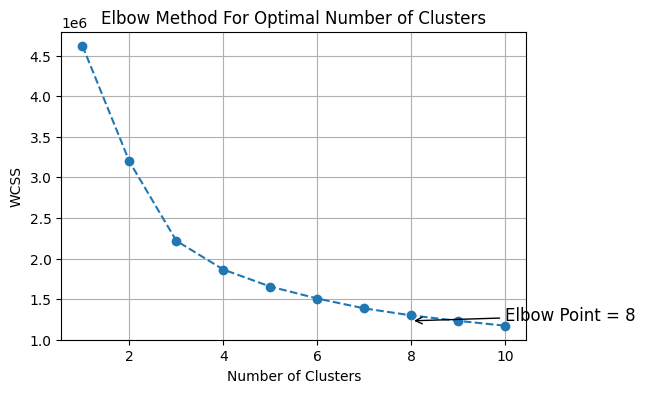

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your dataframe here, replace this line with your actual dataframe
# df2 = ...

# Drop the column you don't want to cluster on (in this case, 'Status', but it could be different in your case)
X = df2.drop('Status', axis=1)

# Initialize an empty list to store the WCSS (Within-Cluster Sum of Squares)
wcss = []

# Run K-means for a range of cluster numbers (for example, from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Calculate the differences between each point and its predecessor
diffs = np.diff(wcss)

# Find the elbow point programmatically
elbow_point = np.argmin(np.diff(diffs)) + 1  # +1 because the first point is at 1 cluster, not 0

# Plot the results on a graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.annotate(f'Elbow Point = {elbow_point}', xy=(elbow_point, wcss[elbow_point]), xytext=(elbow_point+2, wcss[elbow_point]+20),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.grid(True)
plt.show()


# Confusion matrix of different models using LASSO feature

AdaBoost:
Confusion Matrix:
[[972  44]
 [ 83 109]]


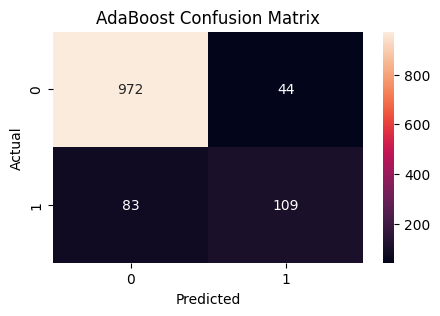

---
ExtraTrees:
Confusion Matrix:
[[978  38]
 [ 96  96]]


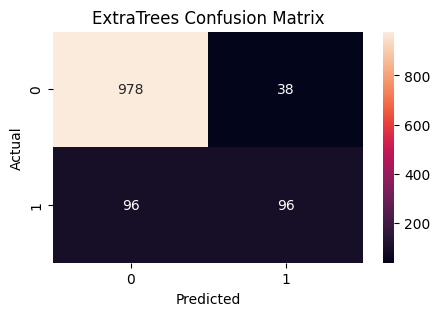

---
QDA:
Confusion Matrix:
[[992  24]
 [106  86]]


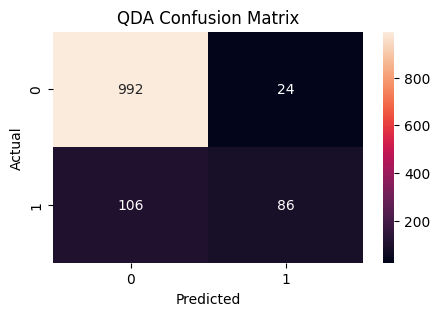

---
CatBoost:
Confusion Matrix:
[[977  39]
 [ 88 104]]


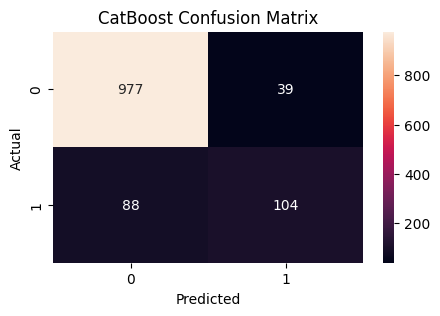

---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 424, number of negative: 2392
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 2816, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150568 -> initscore=-1.730152
[LightGBM] [Info] Start training from score -1.730152
LightGBM:
Confusion Matrix:
[[973  43]
 [ 84 108]]


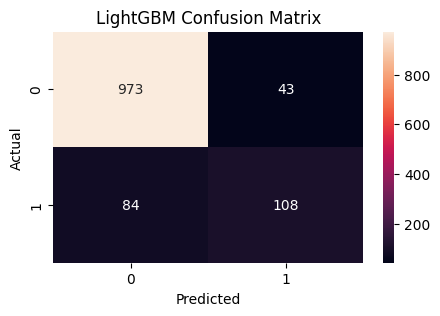

---
GaussianNB:
Confusion Matrix:
[[992  24]
 [106  86]]


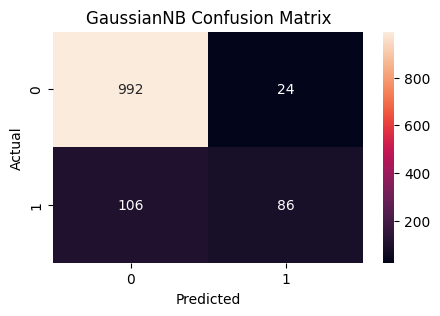

---
PassiveAggressive:
Confusion Matrix:
[[   0 1016]
 [   0  192]]


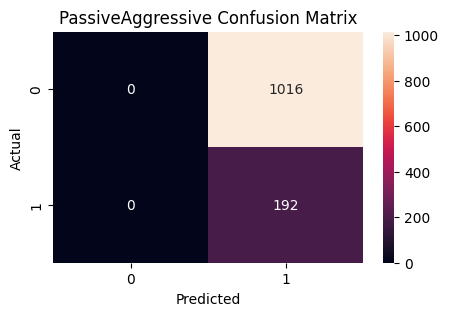

---
Perceptron:
Confusion Matrix:
[[1006   10]
 [ 169   23]]


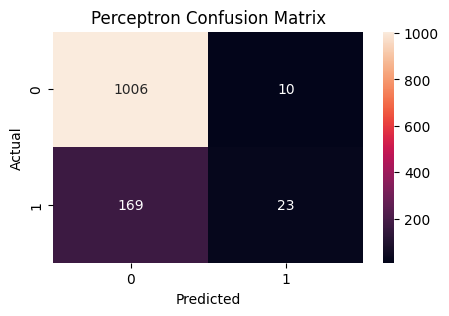

---
RidgeClassifier:
Confusion Matrix:
[[1002   14]
 [ 154   38]]


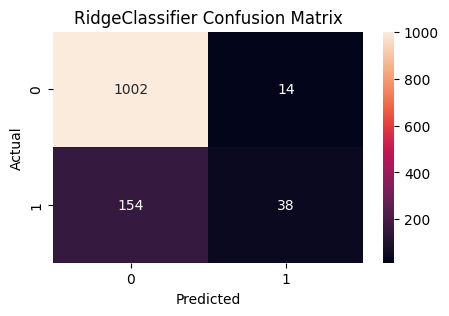

---
SGDClassifier:
Confusion Matrix:
[[969  47]
 [ 80 112]]


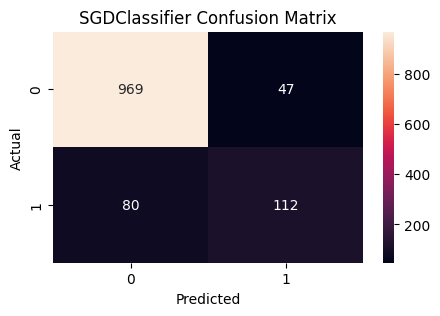

---
Random Forest:
Confusion Matrix:
[[977  39]
 [ 94  98]]


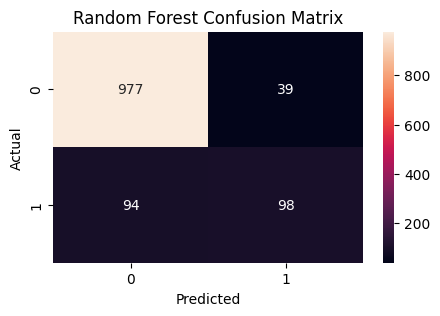

---
Logistic Regression:
Confusion Matrix:
[[995  21]
 [114  78]]


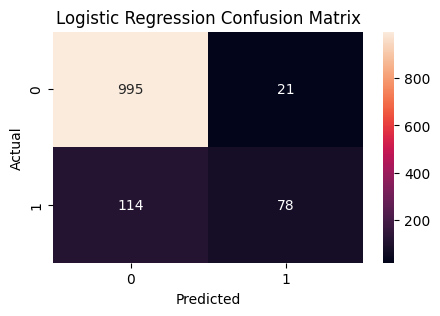

---
Decision Tree:
Confusion Matrix:
[[978  38]
 [ 96  96]]


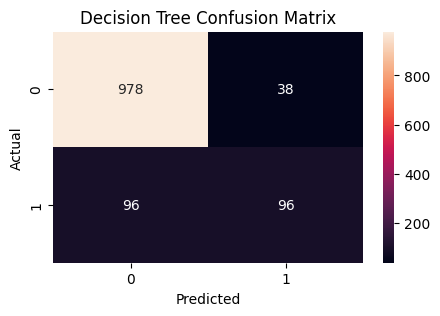

---
XGBoost:
Confusion Matrix:
[[977  39]
 [ 88 104]]


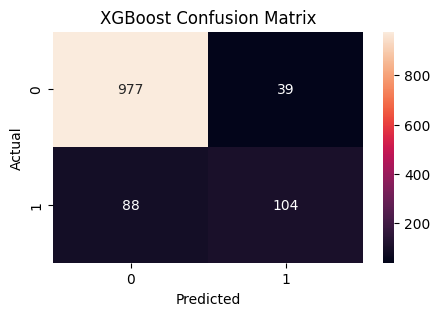

---


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def models_with_confusion_matrix(X_train, Y_train, X_test, Y_test):

    # Initializing models
    model_list = [
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        QDA(),
        CatBoostClassifier(verbose=0),  # verbose=0 to suppress output
        LGBMClassifier(),
        GaussianNB(),
        PassiveAggressiveClassifier(),
        Perceptron(),
        RidgeClassifier(),
        SGDClassifier(),
        RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10),
        LogisticRegression(random_state=0),
        DecisionTreeClassifier(random_state=0, criterion="entropy"),
        XGBClassifier(random_state=0)
    ]

    model_names = [
        'AdaBoost',
        'ExtraTrees',
        'QDA',
        'CatBoost',
        'LightGBM',
        'GaussianNB',
        'PassiveAggressive',
        'Perceptron',
        'RidgeClassifier',
        'SGDClassifier',
        'Random Forest',
        'Logistic Regression',
        'Decision Tree',
        'XGBoost'
    ]

    for i, model in enumerate(model_list):
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        # Display metrics
        print(f"{model_names[i]}:")

        # Generate the confusion matrix
        cm = confusion_matrix(Y_test, Y_pred)
        print("Confusion Matrix:")
        print(cm)

        # Optionally, display the confusion matrix using seaborn
        plt.figure(figsize=(5, 3))
        sns.heatmap(cm, annot=True, fmt='g')
        plt.title(f"{model_names[i]} Confusion Matrix")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print('---')

# Example usage, make sure to replace with your data
models_with_confusion_matrix(X_train_selected, y_train, X_test_selected, y_test)


# Confusion matrix of different models using Full dataset with out LASSO

AdaBoost:
Confusion Matrix:
[[642  30]
 [ 56  77]]


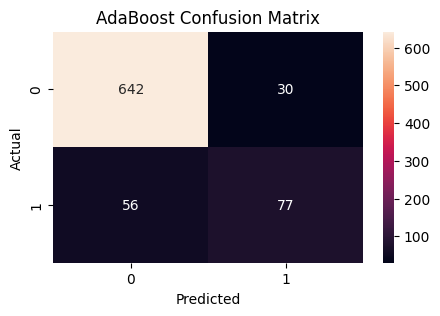

---
ExtraTrees:
Confusion Matrix:
[[652  20]
 [ 67  66]]


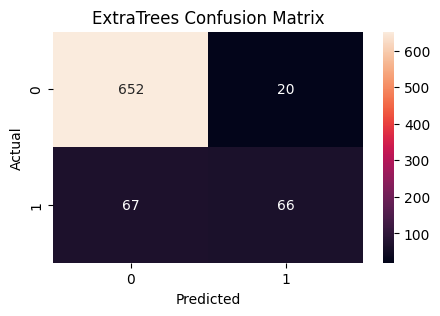

---
QDA:
Confusion Matrix:
[[612  60]
 [ 72  61]]


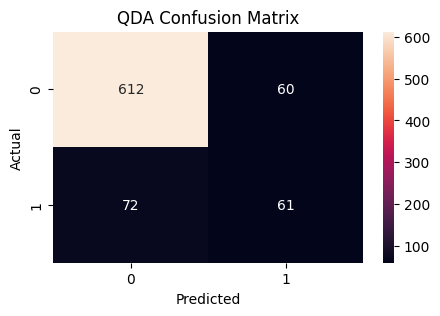

---
CatBoost:
Confusion Matrix:
[[651  21]
 [ 59  74]]


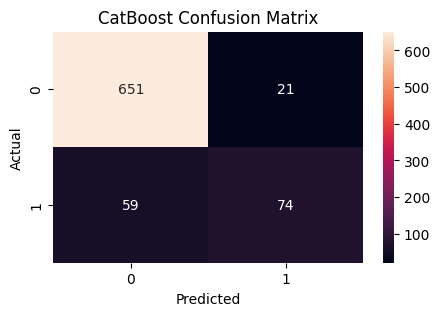

---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 483, number of negative: 2736
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 3219, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150047 -> initscore=-1.734236
[LightGBM] [Info] Start training from score -1.734236
LightGBM:
Confusion Matrix:
[[651  21]
 [ 56  77]]


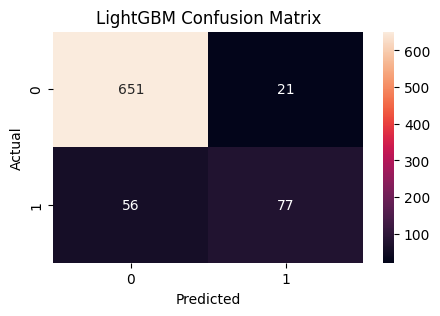

---
GaussianNB:
Confusion Matrix:
[[581  91]
 [ 66  67]]


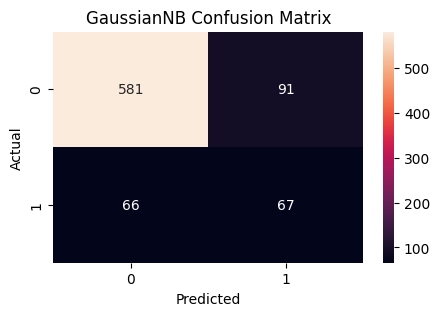

---
PassiveAggressive:
Confusion Matrix:
[[651  21]
 [ 75  58]]


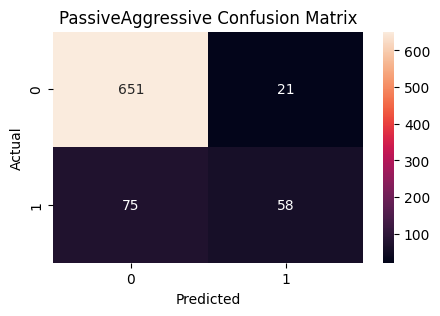

---
Perceptron:
Confusion Matrix:
[[622  50]
 [ 48  85]]


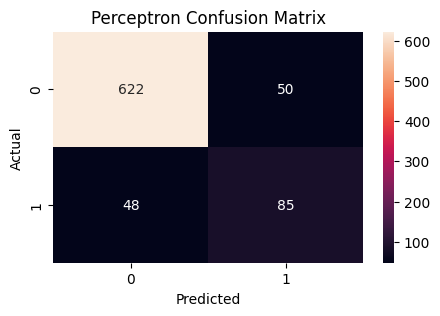

---
RidgeClassifier:
Confusion Matrix:
[[659  13]
 [ 86  47]]


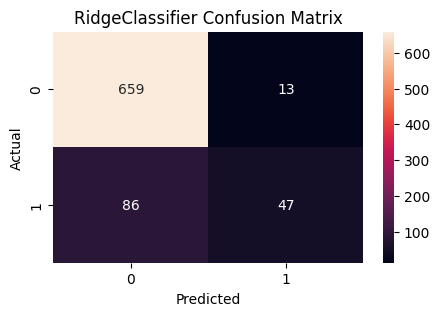

---
SGDClassifier:
Confusion Matrix:
[[449 223]
 [ 17 116]]


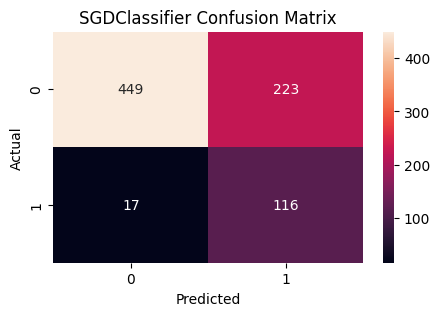

---
Random Forest:
Confusion Matrix:
[[652  20]
 [ 63  70]]


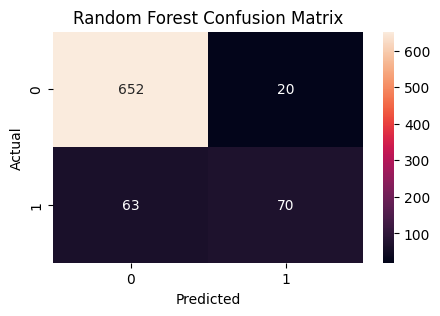

---
Logistic Regression:
Confusion Matrix:
[[651  21]
 [ 77  56]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


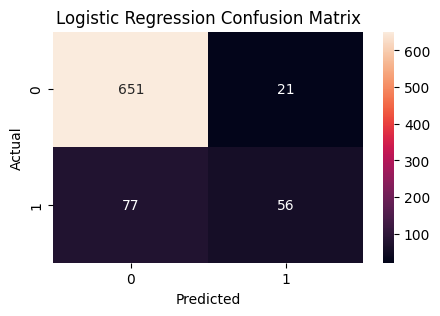

---
Decision Tree:
Confusion Matrix:
[[595  77]
 [ 55  78]]


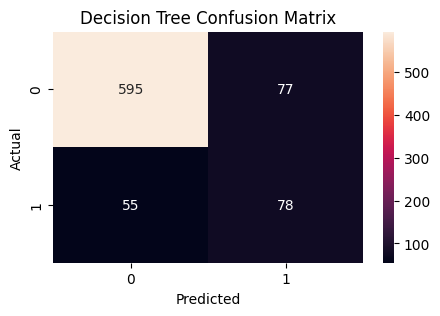

---
XGBoost:
Confusion Matrix:
[[641  31]
 [ 56  77]]


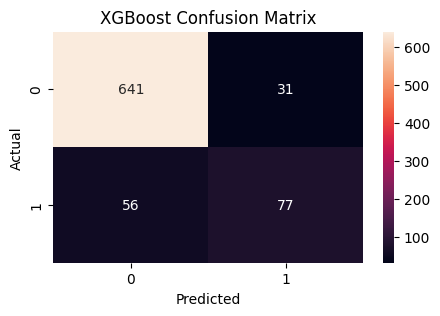

---


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Features of full dataset from entire dataframe and target variable
X = df2[['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
         'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
         'Progesterone Status', 'Regional Node Examined',
         'Reginol Node Positive', 'Survival Months']]
y = df2['Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def models_with_confusion_matrix(X_train, Y_train, X_test, Y_test):

    # Initializing models
    model_list = [
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        QDA(),
        CatBoostClassifier(verbose=0),  # verbose=0 to suppress output
        LGBMClassifier(),
        GaussianNB(),
        PassiveAggressiveClassifier(),
        Perceptron(),
        RidgeClassifier(),
        SGDClassifier(),
        RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10),
        LogisticRegression(random_state=0),
        DecisionTreeClassifier(random_state=0, criterion="entropy"),
        XGBClassifier(random_state=0)
    ]

    model_names = [
        'AdaBoost',
        'ExtraTrees',
        'QDA',
        'CatBoost',
        'LightGBM',
        'GaussianNB',
        'PassiveAggressive',
        'Perceptron',
        'RidgeClassifier',
        'SGDClassifier',
        'Random Forest',
        'Logistic Regression',
        'Decision Tree',
        'XGBoost'
    ]

    for i, model in enumerate(model_list):
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        # Display metrics
        print(f"{model_names[i]}:")

        # Generate the confusion matrix
        cm = confusion_matrix(Y_test, Y_pred)
        print("Confusion Matrix:")
        print(cm)

        # Optionally, display the confusion matrix using seaborn
        plt.figure(figsize=(5, 3))
        sns.heatmap(cm, annot=True, fmt='g')
        plt.title(f"{model_names[i]} Confusion Matrix")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print('---')

# Call the function ,# For the full dataset
models_with_confusion_matrix(X_train, y_train, X_test, y_test)


In [ ]:
# Check if NaN values are still there
print(df2_imputed.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [ ]:
# Extracting non-numeric columns from the original dataframe
non_numeric_columns = df2.select_dtypes(exclude=['number'])


In [ ]:
print(imputed_data.shape)
print(non_numeric_columns.shape)


(4024, 15)
(4024, 0)


In [ ]:
print("Shape of imputed data:", imputed_data.shape)
print("Shape of numeric data:", numeric_data.shape)
print("Column names in numeric data:", numeric_data.columns)


Shape of imputed data: (4024, 15)
Shape of numeric data: (4024, 15)
Column names in numeric data: Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [ ]:
df2 = df2.fillna(df2.mean())


In [ ]:
# Count the number of NaN values in each column
print(df2.isnull().sum())


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [ ]:
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   Grade                   4024 non-null   int64
 7   A Stage                 4024 non-null   int64
 8   Tumor Size              4024 non-null   int64
 9   Estrogen Status         4024 non-null   int64
 10  Progesterone Status     4024 non-null   int64
 11  Regional Node Examined  4024 non-null   int64
 12  Reginol Node Positive   4024 non-null   int64
 13  Survival Months         4024 non-null   int64
 14  Status                  4024 non-null   int64
dtypes: int64(15)
memory u

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# List of columns to encode
cols_to_encode = ['Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']

# Apply Label Encoder on each of the categorical columns
for col in cols_to_encode:
    df2[col] = le.fit_transform(df2[col])

# Check the new data types
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   Grade                   4024 non-null   int64
 7   A Stage                 4024 non-null   int64
 8   Tumor Size              4024 non-null   int64
 9   Estrogen Status         4024 non-null   int64
 10  Progesterone Status     4024 non-null   int64
 11  Regional Node Examined  4024 non-null   int64
 12  Reginol Node Positive   4024 non-null   int64
 13  Survival Months         4024 non-null   int64
 14  Status                  4024 non-null   int64
dtypes: int64(15)
memory u

In [ ]:
df2.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
print(df2_scaled.columns)


Index(['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive',
       'Survival_Months',
       'Race__Other (American Indian/AK Native, Asian/Pacific Islander)',
       'Race__White', 'Marital_Status_Married (including common law)',
       'Marital_Status_Separated', 'Marital_Status_Single (never married)',
       'Marital_Status_Widowed', 'T_Stage__T2', 'T_Stage__T3', 'T_Stage__T4',
       'N_Stage_N2', 'N_Stage_N3', '6th_Stage_IIB', '6th_Stage_IIIA',
       '6th_Stage_IIIB', '6th_Stage_IIIC',
       'Grade_Poorly differentiated; Grade III',
       'Grade_Undifferentiated; anaplastic; Grade IV',
       'Grade_Well differentiated; Grade I', 'A_Stage_Regional',
       'Estrogen_Status_Positive', 'Progesterone_Status_Positive',
       'Status_Dead'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Read the data
df2 = pd.read_csv('/content/cancer_data_2.csv')

# Remove 'Unnamed: 3' column if present
if 'Unnamed: 3' in df2.columns:
    df2.drop('Unnamed: 3', axis=1, inplace=True)

# Replace special characters in column names
df2.columns = df2.columns.str.replace(' ', '_')
df2.columns = df2.columns.str.replace('(', '')
df2.columns = df2.columns.str.replace(')', '')
df2.columns = df2.columns.str.replace('/', '_or_')

# Encode categorical variables
df2 = pd.get_dummies(df2, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
df2_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

# Ensure the target variable 'Status' is in the correct DataFrame
y = df2['Status_Dead']
X_train_full, X_test_full, y_train, y_test = train_test_split(df2_scaled.drop(['Status_Dead'], axis=1), y, test_size=0.2, random_state=42)

# Feature selection using LASSO
lasso = LassoCV(cv=5).fit(X_train_full, y_train)
model = SelectFromModel(lasso, prefit=True)
X_train_selected = model.transform(X_train_full)
X_test_selected = model.transform(X_test_full)
def models_with_auc(X_train, Y_train, X_test, Y_test):
    # Initializing models
    model_list = [
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        QDA(),
        CatBoostClassifier(verbose=0),
        GaussianNB(),
        RandomForestClassifier(random_state=0),
        LogisticRegression(random_state=0),
        DecisionTreeClassifier(random_state=0),
        XGBClassifier(random_state=0)
    ]

    model_names = [
        'AdaBoost',
        'ExtraTrees',
        'QDA',
        'CatBoost',
        'GaussianNB',
        'Random Forest',
        'Logistic Regression',
        'Decision Tree',
        'XGBoost'
    ]

    for i, model in enumerate(model_list):
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        # Display metrics
        print(f"{model_names[i]}:")

        # Check if the model has 'predict_proba' method
        if hasattr(model, 'predict_proba'):
            Y_prob = model.predict_proba(X_test)[:, 1]

            # Display the AUC-ROC
            auc = roc_auc_score(Y_test, Y_prob)
            print(f"AUC-ROC: {auc:.2f}")
        else:
            print("AUC-ROC: Method predict_proba not available")

        print('---')


# Results with full dataset
print("Results with full dataset:")
models_with_auc(X_train_full, y_train, X_test_full, y_test)

# Results with LASSO-selected dataset
print("Results with LASSO-selected dataset:")
models_with_auc(X_train_selected, y_train, X_test_selected, y_test)


Results with full dataset:


<ipython-input-1254-dc06b04a8053>:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2.columns = df2.columns.str.replace('(', '')
<ipython-input-1254-dc06b04a8053>:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2.columns = df2.columns.str.replace(')', '')
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


AdaBoost:
AUC-ROC: 0.89
---
ExtraTrees:
AUC-ROC: 0.84
---
QDA:
AUC-ROC: 0.71
---


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


CatBoost:
AUC-ROC: 0.88
---
GaussianNB:
AUC-ROC: 0.78
---
Random Forest:
AUC-ROC: 0.86
---
Logistic Regression:
AUC-ROC: 0.88
---
Decision Tree:
AUC-ROC: 0.70
---
XGBoost:
AUC-ROC: 0.86
---
Results with LASSO-selected dataset:
AdaBoost:
AUC-ROC: 0.89
---
ExtraTrees:
AUC-ROC: 0.85
---
QDA:
AUC-ROC: 0.67
---


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


CatBoost:
AUC-ROC: 0.88
---
GaussianNB:
AUC-ROC: 0.78
---
Random Forest:
AUC-ROC: 0.87
---
Logistic Regression:
AUC-ROC: 0.88
---
Decision Tree:
AUC-ROC: 0.70
---
XGBoost:
AUC-ROC: 0.86
---


In [ ]:
print(df2_scaled['Status_Dead'].dtype)


float64


In [ ]:
df2_scaled['Status_Dead'] = df2_scaled['Status_Dead'].astype(int)


In [ ]:
print(df2_scaled.isna().sum())


Age                                                                0
Tumor_Size                                                         0
Regional_Node_Examined                                             0
Reginol_Node_Positive                                              0
Survival_Months                                                    0
Race__Other (American Indian/AK Native, Asian/Pacific Islander)    0
Race__White                                                        0
Marital_Status_Married (including common law)                      0
Marital_Status_Separated                                           0
Marital_Status_Single (never married)                              0
Marital_Status_Widowed                                             0
T_Stage__T2                                                        0
T_Stage__T3                                                        0
T_Stage__T4                                                        0
N_Stage_N2                        

In [ ]:
# Check the unique values in your target column
print(y.unique())


[0 1]


In [ ]:
# Convert the target labels if necessary
y = y.replace({2: 1})  # Assuming you want to convert 2s to 1s


In [ ]:
df2_scaled['Status_Dead'] = df2_scaled['Status_Dead'].astype(int)


In [ ]:
X = df2_scaled.drop('Status_Dead', axis=1)  # Features
y = df2_scaled['Status_Dead']  # Labels


# ROC for the Full dataframe

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


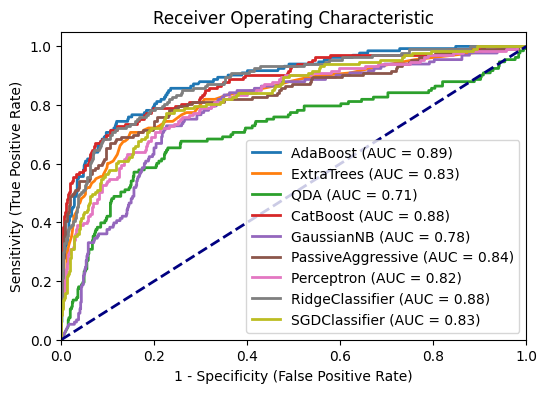

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier

# Assuming df2_scaled is your DataFrame and 'Status_Dead' is the name of your label column
X = df2_scaled.drop('Status_Dead', axis=1)
y = df2_scaled['Status_Dead']
# Convert 2s to 1s in the target column
y = y.replace({2: 1})

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_roc_curves(X_train, y_train, X_test, y_test):
    model_list = [
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        QDA(),
        CatBoostClassifier(verbose=0),
        GaussianNB(),
        PassiveAggressiveClassifier(),
        Perceptron(),
        RidgeClassifier(),
        SGDClassifier()
    ]

    model_names = [
        'AdaBoost',
        'ExtraTrees',
        'QDA',
        'CatBoost',
        'GaussianNB',
        'PassiveAggressive',
        'Perceptron',
        'RidgeClassifier',
        'SGDClassifier'
    ]

    plt.figure(figsize=(6, 4))

    for i, model in enumerate(model_list):
        model.fit(X_train, y_train)

        y_score = None

        if hasattr(model, 'predict_proba'):
            y_score = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_score = model.decision_function(X_test)

        if y_score is not None:
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
        else:
            print(f"{model_names[i]} does not have a 'predict_proba' or 'decision_function' method.")

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.show()

# Run the function using your training and test datasets
plot_roc_curves(X_train, y_train, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


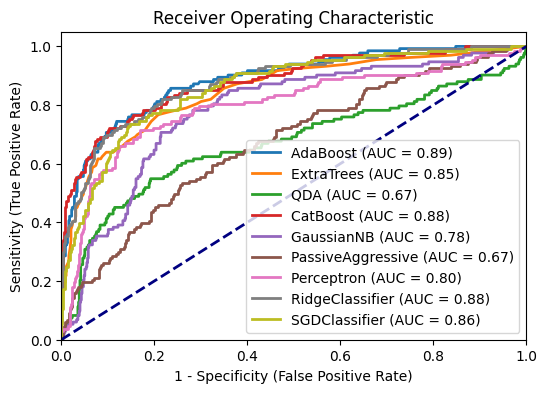

In [ ]:
from sklearn.linear_model import LassoCV

# Feature Selection using Lasso
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)

# Select important features based on LassoCV
important_features = coef[coef != 0].index.tolist()

# Filter the training and testing data to only use important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Now, you can run your existing plot_roc_curves function using these filtered datasets
plot_roc_curves(X_train_selected, y_train, X_test_selected, y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
import re
X_train_selected.columns = [re.sub('[^a-zA-Z0-9]', '_', col) for col in X_train_selected.columns]
X_test_selected.columns = [re.sub('[^a-zA-Z0-9]', '_', col) for col in X_test_selected.columns]


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[LightGBM] [Info] Number of positive: 322, number of negative: 1824
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Info] Number of data points in the train set: 2146, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150047 -> initscore=-1.734236
[LightGBM] [Info] Start training from score -1.734236
[LightGBM] [Info] Number of positive: 322, number of negative: 1824
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 2146, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150047 -> initscore=-1.734236
[LightGBM] [Info] Start training from score -1.734236
[LightGBM] [Info

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

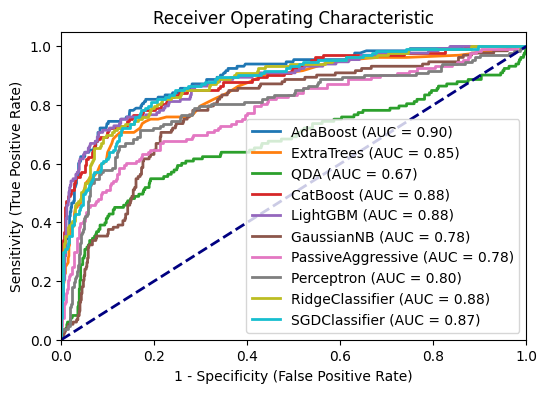

In [ ]:
from sklearn.model_selection import GridSearchCV

def plot_roc_curves(X_train, y_train, X_test, y_test):
    # Define hyperparameter grids for classifiers
    adaboost_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
    extratrees_params = {'n_estimators': [50, 100], 'max_depth': [None, 10]}
    lgbm_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
    ridge_params = {'alpha': [0.01, 0.1, 1]}
    sgd_params = {'alpha': [0.0001, 0.001], 'loss': ['hinge', 'log']}

    model_list = [
        GridSearchCV(AdaBoostClassifier(), adaboost_params, cv=3),
        GridSearchCV(ExtraTreesClassifier(), extratrees_params, cv=3),
        QDA(),
        CatBoostClassifier(verbose=0),
        GridSearchCV(LGBMClassifier(), lgbm_params, cv=3),
        GaussianNB(),
        PassiveAggressiveClassifier(),
        Perceptron(),
        GridSearchCV(RidgeClassifier(), ridge_params, cv=3),
        GridSearchCV(SGDClassifier(), sgd_params, cv=3)
    ]

    model_names = [
        'AdaBoost',
        'ExtraTrees',
        'QDA',
        'CatBoost',
        'LightGBM',
        'GaussianNB',
        'PassiveAggressive',
        'Perceptron',
        'RidgeClassifier',
        'SGDClassifier'
    ]

    plt.figure(figsize=(6, 4))

    for i, model in enumerate(model_list):
        model.fit(X_train, y_train)

        y_score = None

        if hasattr(model, 'predict_proba'):
            y_score = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_score = model.decision_function(X_test)

        if y_score is not None:
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
        else:
            print(f"{model_names[i]} does not have a 'predict_proba' or 'decision_function' method.")

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.show()

# Run the function using your training and test datasets
plot_roc_curves(X_train_selected, y_train, X_test_selected, y_test)
